In [51]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from glob import glob
import os

from sklearn.preprocessing import StandardScaler

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

import pickle
import time
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from rerf.rerfClassifier import rerfClassifier

import warnings
warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [52]:
import pandas as pd
import numpy as np

data = pd.read_csv('D:/Studies/Research_Lab_sem_1/Codes/classifier/features.csv')
X = data.loc[:,'0':'273'].values
y = data.loc[:,'274'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [59]:
np.count_nonzero(y_test==1)

10

[[75 64]
 [ 2  8]]
Accuracy RF 	0.5570469798657718
Balanced Accuracy RF 	0.6697841726618705
Sensitivity RF 	0.539568345323741
Specificity RF 	0.8
F-1 Score RF 	0.5570469798657718


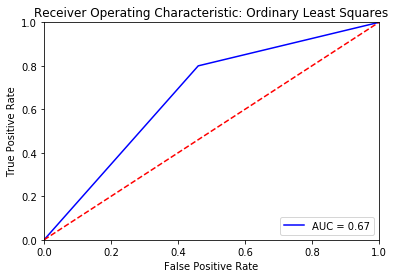

In [48]:
y_lin = y_train
y_lin[y_train == 0] = -1
#print(y_lin)
beta = np.linalg.pinv(X_train.T @ X_train) @ (X_train.T @ y_lin)
#print (beta)
line_x = np.linspace(0, 9)
line_y = -beta[0] / beta[2] - (beta[1] / beta[2]) * line_x
y_pred = X_test@beta
#print (y_pred)
y_est = []
for i in y_pred:
    if (i>0):
        y_est.append(1)
    else:
        y_est.append(0)

#print (y_est)
y_predict = np.array(y_est)

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy RF \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy RF \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity RF \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity RF \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score RF \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic: Ordinary Least Squares')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
####PCA reducing dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

[[90 49]
 [ 2  8]]
Accuracy RF 	0.6577181208053692
Balanced Accuracy RF 	0.7237410071942446
Sensitivity RF 	0.6474820143884892
Specificity RF 	0.8
F-1 Score RF 	0.6577181208053692


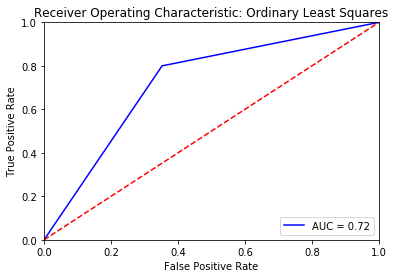

In [50]:
y_lin = y_train
y_lin[y_train == 0] = -1
#print(y_lin)
beta = np.linalg.pinv(X_train_pca.T @ X_train_pca) @ (X_train_pca.T @ y_lin)
#print (beta)
line_x = np.linspace(0, 9)
line_y = -beta[0] / beta[2] - (beta[1] / beta[2]) * line_x
y_pred = X_test_pca@beta
#print (y_pred)
y_est = []
for i in y_pred:
    if (i>0):
        y_est.append(1)
    else:
        y_est.append(0)

#print (y_est)
y_predict = np.array(y_est)

cm = confusion_matrix(y_test, y_predict)
print(cm)
print('Accuracy RF \t' + str(accuracy_score(y_test, y_predict)))

b_acc = balanced_accuracy_score(y_test, y_predict)
print('Balanced Accuracy RF \t' + str(b_acc))

sensitivity = float(cm[0,0])/float((cm[0,0]+cm[0,1]))
print('Sensitivity RF \t' + str(sensitivity))

specificity = float(cm[1,1])/float((cm[1,0]+cm[1,1]))
print('Specificity RF \t' + str(specificity))

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='micro')  
print('F-1 Score RF \t' + str(f1))

import sklearn.metrics as metrics
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic: Ordinary Least Squares')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()